      X   Y
0    40  50
1    45  68
2    45  70
3    42  66
4    42  68
..   ..  ..
96   60  80
97   60  85
98   58  75
99   55  80
100  55  85

[101 rows x 2 columns]
101


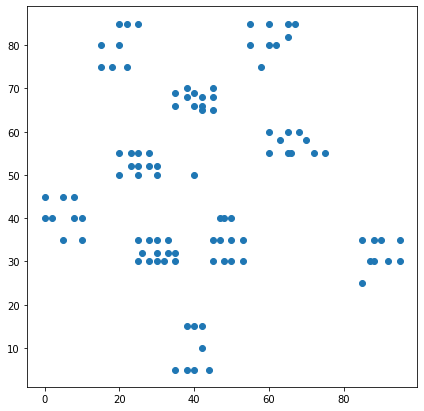

NumPy Array:
[[40 50]
 [45 68]
 [45 70]
 [42 66]
 [42 68]
 [42 65]
 [40 69]
 [40 66]
 [38 68]
 [38 70]
 [35 66]
 [35 69]
 [25 85]
 [22 75]
 [22 85]
 [20 80]
 [20 85]
 [18 75]
 [15 75]
 [15 80]
 [30 50]
 [30 52]
 [28 52]
 [28 55]
 [25 50]
 [25 52]
 [25 55]
 [23 52]
 [23 55]
 [20 50]
 [20 55]
 [10 35]
 [10 40]
 [ 8 40]
 [ 8 45]
 [ 5 35]
 [ 5 45]
 [ 2 40]
 [ 0 40]
 [ 0 45]
 [35 30]
 [35 32]
 [33 32]
 [33 35]
 [32 30]
 [30 30]
 [30 32]
 [30 35]
 [28 30]
 [28 35]
 [26 32]
 [25 30]
 [25 35]
 [44  5]
 [42 10]
 [42 15]
 [40  5]
 [40 15]
 [38  5]
 [38 15]
 [35  5]
 [50 30]
 [50 35]
 [50 40]
 [48 30]
 [48 40]
 [47 35]
 [47 40]
 [45 30]
 [45 35]
 [95 30]
 [95 35]
 [53 30]
 [92 30]
 [53 35]
 [45 65]
 [90 35]
 [88 30]
 [88 35]
 [87 30]
 [85 25]
 [85 35]
 [75 55]
 [72 55]
 [70 58]
 [68 60]
 [66 55]
 [65 55]
 [65 60]
 [63 58]
 [60 55]
 [60 60]
 [67 85]
 [65 85]
 [65 82]
 [62 80]
 [60 80]
 [60 85]
 [58 75]
 [55 80]
 [55 85]]
[[40, 50], [45, 68], [45, 70], [42, 66], [42, 68], [42, 65], [40, 69], [40, 6

In [26]:
import pandas as pd
import math
import numpy as np
import random
import networkx as nx
import matplotlib.pyplot as plt

# Begin and end point is first city
df = pd.read_csv("C101.csv")

citySize = len(df)

print(df)
print(citySize)

x = np.array(df['X'])
y = np.array(df['Y'])
fig = plt.figure()
fig.set_figheight(7)
fig.set_figwidth(7)
plt.scatter(x, y)
plt.show()

# array to list
arr = np.array(df)
print(f'NumPy Array:\n{arr}')

coordinate = arr.tolist()

print(coordinate)

In [27]:
#https://github.com/sudhan-bhattarai/Simulated_Annealing_Travelling_Salesman_Problem
import pandas as pd
import math
import numpy as np

number_of_nodes = 101            # customer size (upto '400')


''' following function generates coordinates (x,y) of 'n' customer nodes in a [n,2] array '''

def generateCoordinates():
    #data = pd.read_csv('MVRP_400N.txt', ' ')
    data = pd.read_csv('C101.csv', ',')
    df = pd.DataFrame(data)
    coordinates = np.empty([number_of_nodes, 2])
    for i in range(number_of_nodes):
        for j in range(2):
            coordinates[i, 0] = df["X"][i]
            coordinates[i, 1] = df["Y"][i]
    return coordinates


coordinates = generateCoordinates()


''' this class passes coordinates of customer grid and do distance calculations between nodes '''

class distances:

    def __init__(self, coordinates):
        self.grid = coordinates
        self.distance_grid = np.empty((len(self.grid), len(self.grid)))

    ''' following function is to create 'n' by 'n' array storing distance from one node to other in respective cells'''

    def distance_matrix(self):
        for i in range(len(self.grid)):
            for j in range(len(self.grid)):
                self.distance_grid[i, j] = math.sqrt(
                    ((self.grid[i][0] - self.grid[j][0]) ** 2 + (self.grid[i][1] - self.grid[j][1]) ** 2))
        return self.distance_grid

    def get_distance_matrix(self):
        return self.distance_matrix()

    def distance(self, node1, node2):
        return self.distance_grid[node1, node2]

    ''' calculating total distance in a tour'''

    def tour_cost(self, tour=[]):
        total_distance = 0
        for i in range(len(tour) - 1):
            total_distance += self.distance_grid[tour[i], tour[i + 1]]
        total_distance += self.distance_grid[tour[len(tour) - 1], tour[0]]
        return total_distance

    ''' passes list of nodes in a tour and returns respective coordinates of customer nodes'''

    def generate_coordinates(self, tour=[]):
        tour_coordinates = np.empty([len(tour), 2])
        for i in range(len(tour)):
            for j in range(2):
                tour_coordinates[i, j] = self.grid[tour[i], j]
        return tour_coordinates.astype('int')


''' nearest neighbor as a greedy heuristic to create initial good solution'''

class nearestNeighborSearch:

    def __init__(self, coordinates):
        self.coordinates = coordinates
        self.solution = []

    def NNS(self):
        self.N = len(self.coordinates)
        free_nodes = []
        dist = distances(self.coordinates)
        dist.get_distance_matrix()
        for i in range(self.N - 1):
            free_nodes.append(i + 1)
        current_node = 0
        self.solution = [current_node]
        while free_nodes:
            next_node = min(
                free_nodes, key=lambda x: dist.distance(current_node, x))
            free_nodes.remove(next_node)
            self.solution.append(next_node)
            current_node = next_node
        return self.solution


dist = distances(coordinates)
dist.get_distance_matrix()
nns = nearestNeighborSearch(coordinates)
nns.NNS()

print('\nInitial solution by NNS is:', dist.tour_cost(nns.solution))
print('\nInitial tour found is:', nns.NNS())


Initial solution by NNS is: 596.8755969495246

Initial tour found is: [0, 20, 21, 22, 23, 26, 28, 27, 25, 24, 29, 30, 34, 36, 39, 38, 37, 35, 31, 32, 33, 52, 49, 47, 43, 42, 41, 40, 44, 45, 46, 48, 50, 51, 59, 57, 55, 54, 53, 56, 58, 60, 68, 64, 61, 72, 74, 62, 66, 69, 67, 65, 63, 90, 89, 88, 85, 84, 83, 82, 86, 87, 91, 98, 96, 95, 94, 93, 92, 97, 100, 99, 2, 1, 4, 3, 5, 7, 8, 9, 6, 11, 10, 75, 13, 17, 18, 19, 15, 16, 14, 12, 81, 78, 76, 71, 70, 73, 77, 79, 80]


In [28]:
#https://gist.github.com/wbgalvao/1fbbf6eb219f0cb295dcd96c3c3be2c7
import random
import copy

import numpy as np
from numpy.linalg import norm


class State:
    def __init__(self, route: [], distance: int = 0):
        self.route = route
        self.distance = distance

    def __eq__(self, other):
        for i in range(len(self.route)):
            if self.route[i] != other.route[i]:
                return False
        return True

    def __lt__(self, other):
        return self.distance < other.distance

    def __repr__(self):
        return "({0},{1})\n".format(self.route, self.distance)

    def copy(self):
        return State(self.route, self.distance)

    def deepcopy(self):
        return State(copy.deepcopy(self.route), copy.deepcopy(self.distance))

    def update_distance(self, matrix, home):
        self.distance = 0
        from_index = home
        for i in range(len(self.route)):
            self.distance += matrix[from_index][self.route[i]]
            from_index = self.route[i]
        self.distance += matrix[from_index][home]


class City:
    def __init__(self, index: int, distance: int):
        self.index = index
        self.distance = distance

    def __lt__(self, other):
        return self.distance < other.distance


def get_random_solution(
    matrix: [], home: int, city_indexes: [], size: int
):
    #cities = city_indexes.copy()
    coordinates = generateCoordinates()
    nns = nearestNeighborSearch(coordinates)
    cities = nns.NNS()
    cities.pop(home)
    population = []
    for i in range(size):
        #random.shuffle(cities)
        state = State(cities[:])
        state.update_distance(matrix, home)
        population.append(state)
    population.sort()
    return population[0]

class nearestNeighborSearch:

    def __init__(self, coordinates):
        self.coordinates = coordinates
        self.solution = []

    def NNS(self):
        self.N = len(self.coordinates)
        free_nodes = []
        dist = distances(self.coordinates)
        dist.get_distance_matrix()
        for i in range(self.N - 1):
            free_nodes.append(i + 1)
        current_node = 0
        self.solution = [current_node]
        while free_nodes:
            next_node = min(
                free_nodes, key=lambda x: dist.distance(current_node, x))
            free_nodes.remove(next_node)
            self.solution.append(next_node)
            current_node = next_node
        return self.solution

def mutate(matrix: [], home: int, state: State, mutation_rate: float = 0.01):
    mutated_state = state.deepcopy()
    for i in range(len(mutated_state.route)):
        if random.random() < mutation_rate:
            j = int(random.random() * len(state.route))
            city_1 = mutated_state.route[i]
            city_2 = mutated_state.route[j]
            mutated_state.route[i] = city_2
            mutated_state.route[j] = city_1
    mutated_state.update_distance(matrix, home)
    return mutated_state


def hill_climbing(
    matrix: [],
    home: int,
    initial_state: nearestNeighborSearch,
    max_iterations: int,
    mutation_rate: float = 0.01,
):
    best_state = initial_state
    iterator = 0
    while True:
        neighbor = mutate(matrix, home, best_state, mutation_rate)
        if neighbor.distance >= best_state.distance:
            iterator += 1
            if iterator > max_iterations:
                break
        if neighbor.distance < best_state.distance:
            best_state = neighbor
    return best_state


def get_euclidean_distance(p, q):
    return round(norm(np.array(p) - np.array(q)))


def main():

    # Extracted from the Western Sahara city coordinates
    # found in http://www.math.uwaterloo.ca/tsp/world/countries.html

    my_list = coordinate
    my_dict = dict() 
    for index,value in enumerate(my_list):
      my_dict[index] = value

    cities_coordinates = my_dict

    D = []
    for _, target_coordinates in cities_coordinates.items():
        distances = []
        for _, coordinates in cities_coordinates.copy().items():
            distances.append(get_euclidean_distance(target_coordinates, coordinates))
        D.append(distances)
        #(get_euclidean_distance(target_coordinates, coordinates))
        #(key=lambda x: dist.distance(target_coordinates, coordinates))

    home = 0
    max_iterations = 1000000
    cities = list(cities_coordinates.keys())
    city_indexes = [index for index in cities]

    state = get_random_solution(D, home, city_indexes, 100)
    print("-- Initial state solution --")
    print(cities[home], end="")
    for i in range(0, len(state.route)):
        print(" -> " + str(cities[state.route[i]]), end="")
    print(" -> " + str(cities[home]), end="")
    print("\n\nTotal distance: {0} ".format(state.distance))
    print()

    state = hill_climbing(D, home, state, max_iterations, 0.1)
    print("-- Hill climbing solution --")
    print(cities[home], end="")
    for i in range(0, len(state.route)):
        print(" -> " + str(cities[state.route[i]]), end="")
    print(" -> " + str(cities[home]), end="")
    print("\n\nTotal distance: {0} ".format(state.distance))
    print()


if __name__ == "__main__":
    main()

-- Initial state solution --
0 -> 20 -> 21 -> 22 -> 23 -> 26 -> 28 -> 27 -> 25 -> 24 -> 29 -> 30 -> 34 -> 36 -> 39 -> 38 -> 37 -> 35 -> 31 -> 32 -> 33 -> 52 -> 49 -> 47 -> 43 -> 42 -> 41 -> 40 -> 44 -> 45 -> 46 -> 48 -> 50 -> 51 -> 59 -> 57 -> 55 -> 54 -> 53 -> 56 -> 58 -> 60 -> 68 -> 64 -> 61 -> 72 -> 74 -> 62 -> 66 -> 69 -> 67 -> 65 -> 63 -> 90 -> 89 -> 88 -> 85 -> 84 -> 83 -> 82 -> 86 -> 87 -> 91 -> 98 -> 96 -> 95 -> 94 -> 93 -> 92 -> 97 -> 100 -> 99 -> 2 -> 1 -> 4 -> 3 -> 5 -> 7 -> 8 -> 9 -> 6 -> 11 -> 10 -> 75 -> 13 -> 17 -> 18 -> 19 -> 15 -> 16 -> 14 -> 12 -> 81 -> 78 -> 76 -> 71 -> 70 -> 73 -> 77 -> 79 -> 80 -> 0

Total distance: 596 

-- Hill climbing solution --
0 -> 20 -> 21 -> 22 -> 23 -> 26 -> 28 -> 27 -> 25 -> 24 -> 29 -> 30 -> 34 -> 36 -> 39 -> 38 -> 37 -> 35 -> 31 -> 32 -> 33 -> 52 -> 49 -> 47 -> 43 -> 42 -> 41 -> 40 -> 44 -> 45 -> 46 -> 48 -> 50 -> 51 -> 59 -> 57 -> 55 -> 54 -> 53 -> 56 -> 58 -> 60 -> 68 -> 64 -> 61 -> 72 -> 74 -> 62 -> 66 -> 69 -> 67 -> 65 -> 63 -> 90 